TP Final DSP

In [3]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

mat_struct = sio.loadmat('./ECG_TP4.mat')
qrs_det = mat_struct['qrs_detections']
ecg_one_lead = mat_struct['ecg_lead']

# La señal fue muestreada a 1KHz
fs = 1000
Ts = 1/fs

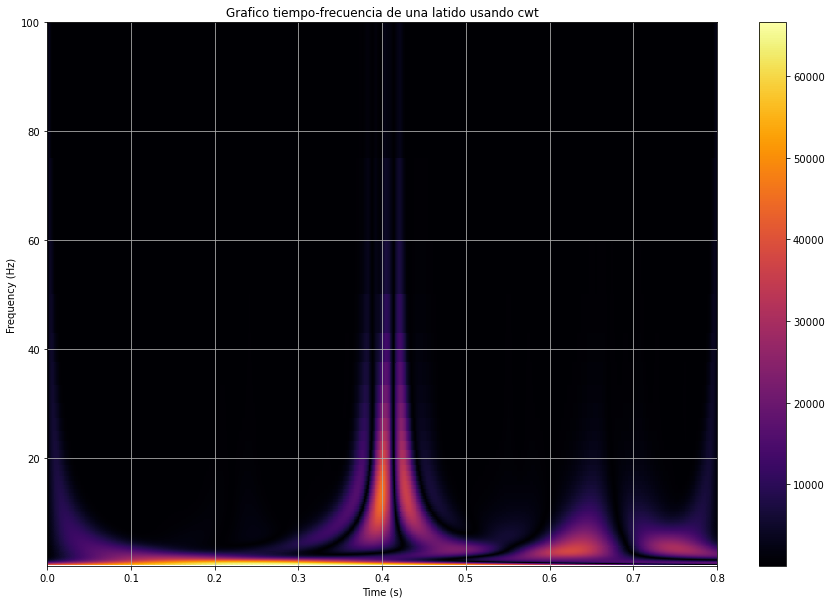

In [4]:
# Tiempo-Frecuencia de un latido
N = 800
N2 = int(N/2)

lat_pos = qrs_det[0]
lat_per = ecg_one_lead[int(lat_pos-N2):int(lat_pos+N2)]

widths = np.arange(3, 1000)
cwtmatr, freqs = pywt.cwt(lat_per.reshape(N),widths,'gaus2',sampling_period=Ts)

t = np.linspace(start=0, stop=N*Ts, num=N)
plt.figure(figsize=(15, 10))
plt.pcolormesh(t, freqs, abs(cwtmatr), cmap = "inferno")
plt.title('Grafico tiempo-frecuencia de una latido usando cwt')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.grid(True)
plt.colorbar()

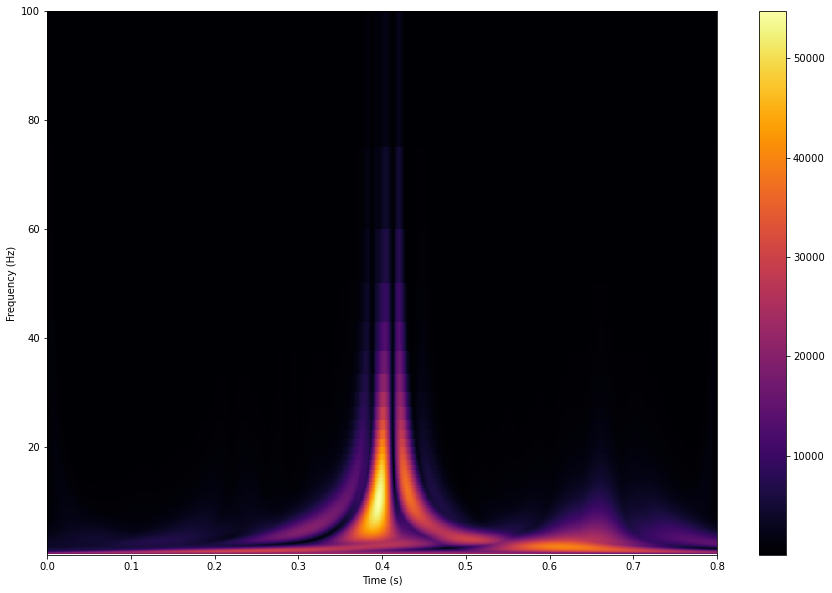

In [5]:
# Grafico de Tiempo-Frecuencia de promedio de cwt de latidos
ecg_part = ecg_one_lead[0:100000]

N = 800
N2 = int(N/2)
widths = np.arange(3, 1000)
i = 0

TempSum = np.zeros([len(widths),N])
for lat in qrs_det:
    per = ecg_part[int(lat-N2):int(lat+N2)]
    auxLen = len(per)
    if auxLen != 0:
        cwtmatr, freqs=pywt.cwt(per.reshape(N),widths,'gaus2',sampling_period=Ts)
        TempSum += abs(cwtmatr)
        i += 1
AvgCwt = TempSum / i
t = np.linspace(start=0, stop=N*Ts, num=N)
plt.figure(figsize=(15, 10))
plt.pcolormesh(t, freqs, abs(AvgCwt), cmap = "inferno")
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.colorbar()

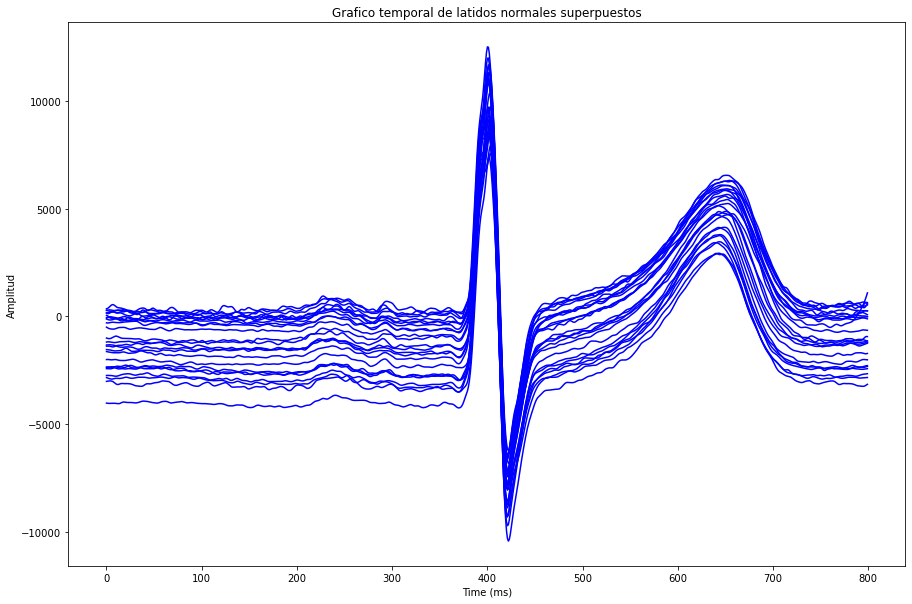

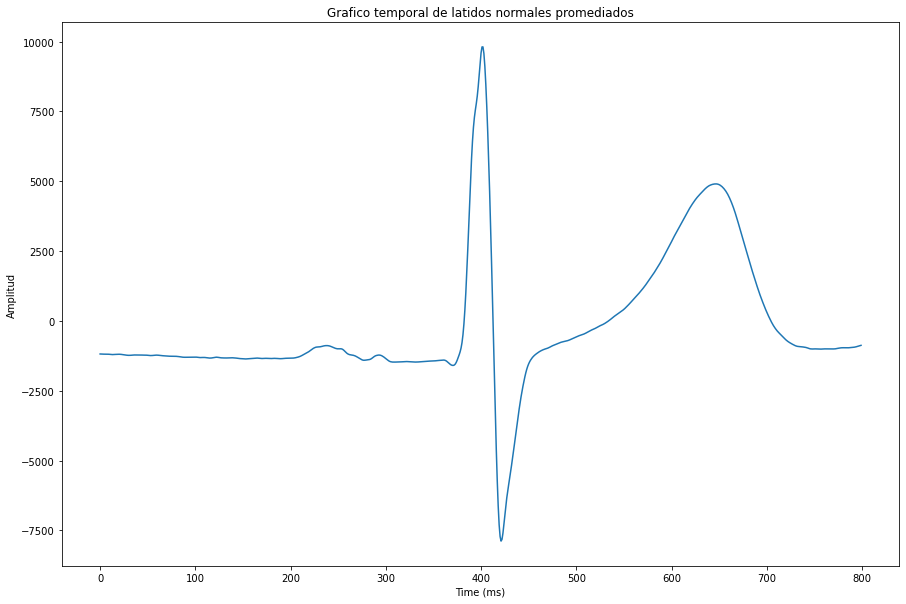

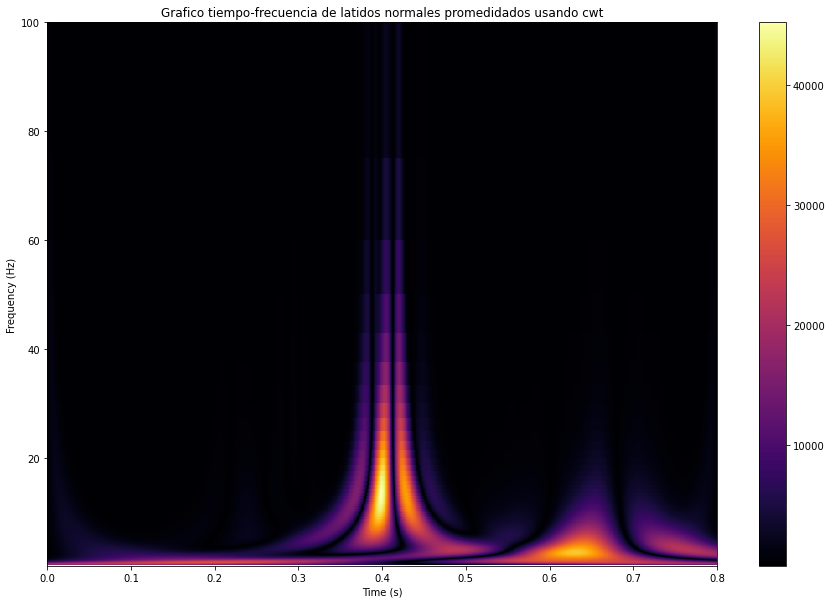

In [6]:
# Grafico de Tiempo-Frecuencia de cwt de promedio de latidos
normal_hb = np.arange(0,10)
b = np.arange(14,29)
normal_hb = np.concatenate((normal_hb,b))

N = 800
N2 = int(N/2)
latidos = np.zeros([N,len(normal_hb)])
i = 0
plt.figure(figsize=(15, 10))
plt.title('Grafico temporal de latidos normales superpuestos')
plt.ylabel('Amplitud')
plt.xlabel('Time (ms)')
for pos in normal_hb:
    lat_pos = int(qrs_det[pos])
    lat = ecg_one_lead[lat_pos-N2:lat_pos+N2]
    latidos[:,i] = lat[:,0]
    i += 1
    plt.plot(lat, color="blue")
    
hb_avg = np.mean(latidos,axis=1)
plt.figure(figsize=(15, 10))
plt.plot(hb_avg)
plt.title('Grafico temporal de latidos normales promediados')
plt.ylabel('Amplitud')
plt.xlabel('Time (ms)')

widths = np.arange(3, 1000)
cwtmatr, freqs=pywt.cwt(hb_avg.reshape(N),widths,'gaus2',sampling_period=Ts)
t = np.linspace(start=0, stop=N*Ts, num=N)
plt.figure(figsize=(15, 10))
plt.pcolormesh(t, freqs, abs(cwtmatr), cmap = "inferno")
plt.title('Grafico tiempo-frecuencia de latidos normales promedidados usando cwt')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.colorbar()